In [2]:
 %matplotlib notebook
import pandas as pd
 import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [20]:
output_data = pd.read_csv('Output Data Clean.csv')
output_data.head()
output_data['Population Density'] = output_data['Population']/output_data['Land Area']
output_data['Total Crime'] = output_data['Violent Crime'] + output_data['Property Crime']
output_data['Citizens per Officer'] = output_data['Population']/output_data['Total Officers']
output_data['Officer per Square Mile'] = output_data['Total Officers'] / output_data['Land Area']
output_data['Total Crime Rate'] = output_data['Total Crime'] / output_data['Population'] * 100000
output_data['Violent Crime Rate'] = output_data['Violent Crime'] / output_data['Population'] * 100000
output_data['Property Crime Rate'] = output_data['Property Crime'] / output_data['Population'] * 100000
output_data.sort_values(by='Violent Crime', ascending=False).head()
output_data = output_data.drop([21])
output_data = output_data.drop([36])
output_data.head()
output_data.sort_values(by='Total Crime Rate', ascending=False).head()

,County,County Type,Violent Crime,Murder and Nonnegligent Manslaughter,Forcible Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny - Theft,...,Total Officers,Population,Land Area,Population Density,Total Crime,Citizens per Officer,Officer per Square Mile,Total Crime Rate,Violent Crime Rate,Property Crime Rate
22,San Joaquin,Metropolitan,5427,63,161,1826,3377,27015,7434,16728,...,883,685306,1391,492.671459,32442,776.110985,0.634795,4733.943669,791.909016,3942.034653
4,Fresno,Metropolitan,4904,63,181,1358,3302,38442,8982,22680,...,1793,930450,5957,156.194393,43346,518.934746,0.300990,4658.606051,527.056800,4131.549250
31,Stanislaus,Metropolitan,2669,29,134,767,1739,20075,5386,11687,...,801,514453,1494,344.346051,22744,642.263421,0.536145,4421.006389,518.803467,3902.202922
6,Kern,Metropolitan,4875,74,163,1221,3417,30156,9420,15747,...,1345,839631,8131,103.262944,35031,624.260967,0.165416,4172.189926,580.612198,3591.577729
17,Sacramento,Metropolitan,8501,82,387,3093,4939,46773,12720,28605,...,2232,1418788,964,1471.771784,55274,635.657706,2.315353,3895.860410,599.173379,3296.687031


In [21]:
per_citizen = output_data.iloc[:, 16]

In [22]:
total_crime = output_data.iloc[:,18]

<IPython.core.display.Javascript object>


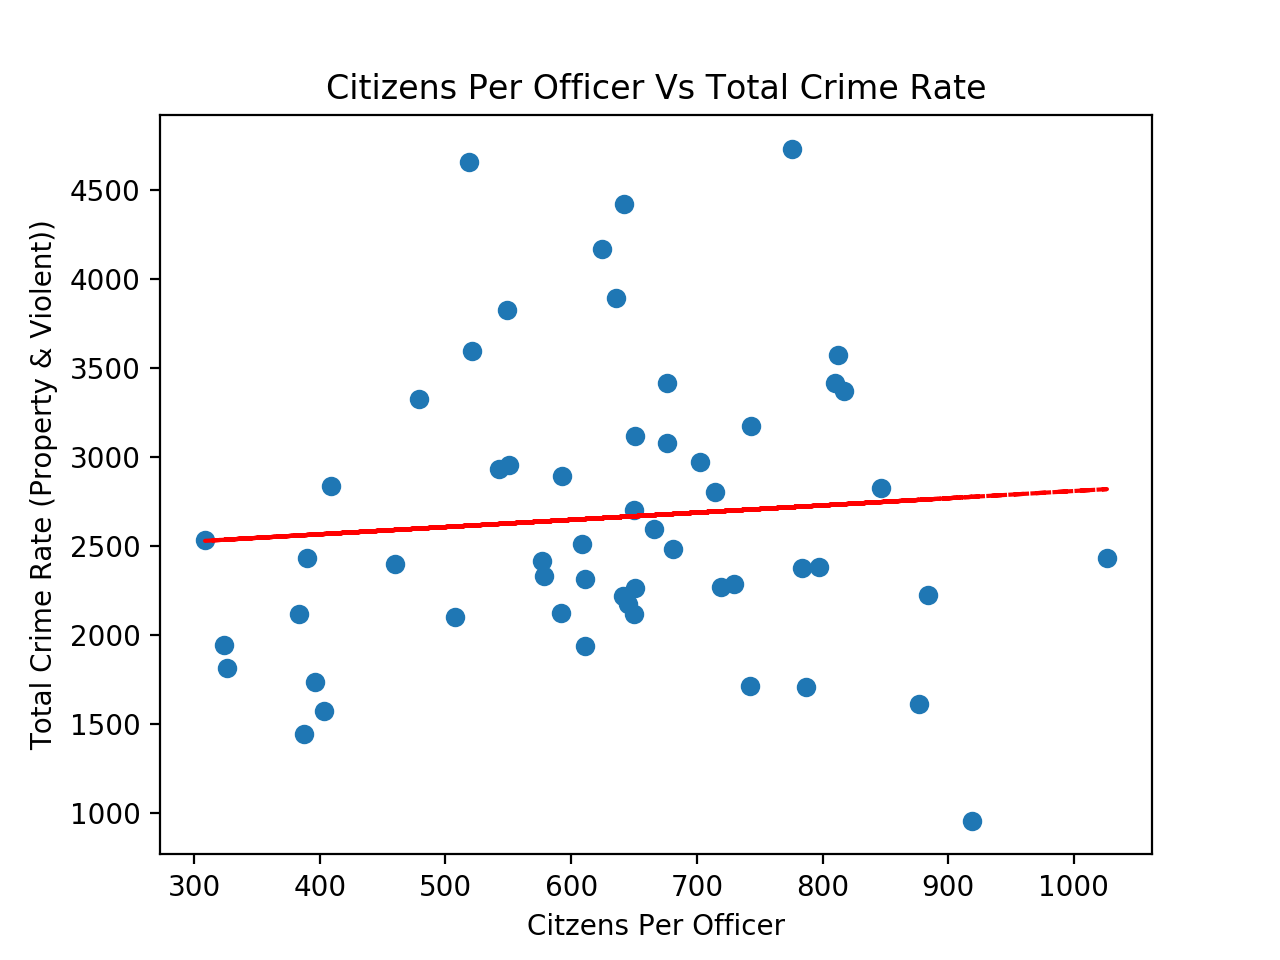

Text(0, 0.5, 'Total Crime Rate (Property & Violent))')

In [28]:
plt.scatter(per_citizen, total_crime)

z = np.polyfit(per_citizen, total_crime, 1)
p = np.poly1d(z)
plt.plot(per_citizen,p(per_citizen), 'r--')
plt.show()

plt.title("Citizens Per Officer Vs Total Crime Rate")
plt.xlabel("Citzens Per Officer")
plt.ylabel("Total Crime Rate (Property & Violent))")

In [24]:
np.corrcoef(per_citizen, total_crime)

array([[1.       , 0.0811192],
       [0.0811192, 1.       ]])

In [27]:
plt.savefig("../Images/citizens per officer vs total crime")